# Assignment 1 for FIT5212, Semester 1

**Student Name:**  Alexander Satrio Parlindungan

**Student ID:**    31057705

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Part 1:  Text Classification

The full dataset is halved here for the express purpose of reducing the time it takes for the RNN models to run.

In [130]:
# import the required libraries
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, precision_recall_curve
from collections import defaultdict
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# loading dataset
import csv
df_train = pd.read_csv("/content/drive/MyDrive/5212/train_set.csv", delimiter=',', header=0)
df_test = pd.read_csv("/content/drive/MyDrive/5212/test_set.csv", delimiter=',', header=0)
df_valid = pd.read_csv("/content/drive/MyDrive/5212/dev_set.csv", delimiter=',', header=0)

df_train = df_train[:int(len(df_train)/2)]

### Part 1A: Statistical Method



**Text Pre-Processing**

In [ ]:
# create pre-processing method to remove stopwords and lematize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(str(text).lower())
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t.isalpha() and t not in stop_words]
    return ' '.join(tokens)

def preprocess_both(row):
    return pd.Series({
        'clean_title': preprocess(row['title']),
        'clean_abstract': preprocess(row['abstract'])
    })

# Cleaning data for the training dataset
df_train[['clean_title', 'clean_abstract']] = df_train.apply(preprocess_both, axis=1)

# Cleaning the data for the test dataset
df_test[['clean_title', 'clean_abstract']] = df_test.apply(preprocess_both, axis=1)

df_valid[['clean_title', 'clean_abstract']] = df_valid.apply(preprocess_both, axis=1)

#### Predicting ComputationalLinguistics using Title

To ensure that the results can be compared more easily, I created a function to collect the results of the models. The statistical models are largely the same, with the only differences being how much of the dataset is included and which columns are taken.

In [ ]:
# Function to collect the results of the data
full_results = {}


def results_collect(model_name, y_test, y_pred, y_probs):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)

    # Store the results in the dict under their model names
    full_results[model_name] = {
        "y_test": y_test,
        "y_pred": y_pred,
        "y_probs": y_probs,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
    }

**1000 Rows**

In [ ]:
# name the model
model_name = "Statistical Method Title 1k Rows"
train_data1 = df_train.iloc[:1000]

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_data1['clean_title'])
X_test = vectorizer.transform(df_test['clean_title'])
y_train = train_data1['ComputationalLinguistics']
y_test = df_test['ComputationalLinguistics']

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

In [ ]:
# input predictions
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]


# save the data using the function.
if 'model_results' not in globals():
    model_results = {}

model_results[model_name] = (y_test, y_probs)

results_collect(model_name, y_test, y_pred, y_probs)



**All Rows**

In [ ]:
model_name = "Statistical Method Title All Rows"
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features= int(len(df_train)/2))
X_train = vectorizer.fit_transform(df_train['clean_title'])
X_test = vectorizer.transform(df_test['clean_title'])
y_train = df_train['ComputationalLinguistics']
y_test = df_test['ComputationalLinguistics']

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# input predictions
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

results_collect(model_name, y_test, y_pred, y_probs)

#### Predicting ComputationalLinguistics using Abstract

**1000 Rows**

In [ ]:
model_name = "Statistical Model Abstract 1k Rows"
train_data1 = df_train.iloc[:1000]

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_data1['clean_abstract'])
X_test = vectorizer.transform(df_test['clean_abstract'])
y_train = train_data1['ComputationalLinguistics']
y_test = df_test['ComputationalLinguistics']

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# input predictions
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

results_collect(model_name, y_test, y_pred, y_probs)


**All Data**

Precision: 0.9137
Recall:    0.9257
F1 Score:  0.9197
Accuracy:  0.8832


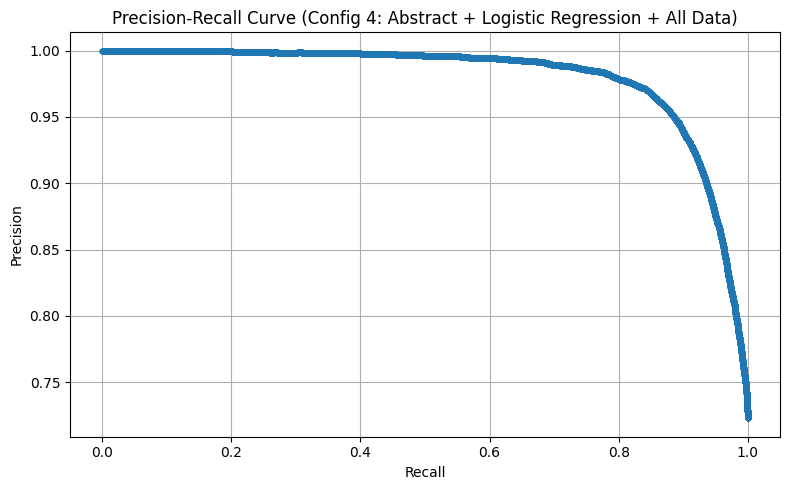

In [ ]:
model_name = "Statistical Model Abstract All Rows"
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(df_train['clean_abstract'])
X_test = vectorizer.transform(df_test['clean_abstract'])
y_train = df_train['ComputationalLinguistics']
y_test = df_test['ComputationalLinguistics']

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# input predictions
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

results_collect(model_name, y_test, y_pred, y_probs)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Accuracy:  {acc:.4f}")

# PR Curve
prec_curve, recall_curve, _ = precision_recall_curve(y_test, y_probs)
plt.figure(figsize=(8, 5))
plt.plot(recall_curve, prec_curve, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Config 4: Abstract + Logistic Regression + All Data)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Part 1B: RNN Method

With the RNN method, the general steps of each model is to first, generate the vocabulary based on the already pre-processed dataset, and then load the vocabulary into the training datasets while pre-processing them, and then finally create the model and run them through it.

In [ ]:
# Downgrading
#!pip install torch==2.0.0 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 588.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lit: filename=lit-15.0.7-py3-none-any.whl size=89990 sha256=798e4424512d45070db5ac21b2048b5a5dfd98df823df36baf5ba0f60f29391e
  Stored in directory: /root/.cache/pip/wheels/fc/5d/45/34fe9945d5e45e261134e72284395be36c2d4828af38e2b0fe
Successfully built lit
  Attempting uninstall: triton
    Found existing installation: triton 3.2.0
    Uninstalling triton-3.2.0:
      Successfully uninstalled triton-3.2.0
  Attempting uninstall: torch
    Found existing installation: torch 2.6.0+cu124
    Uninstalling torch-2.6.0+cu124:
      Successfully uninstalled torch-2.6.0+cu124
ERROR: pip's dependency resolver does not currently take into acc

In [ ]:
#!pip install torchtext==0.15.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 79.0 MB/s eta 0:00:00


Import the torch libraries

In [ ]:
import torch
import re
from nltk.corpus import stopwords
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.functional import to_map_style_dataset
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence
from torchtext import data
import torch.optim as optim

1000 Cases

In [ ]:
# Load the previous dataset
rnn_train = list(zip(df_train['ComputationalLinguistics'], df_train['clean_abstract']))
rnn_test = list(zip(df_test['ComputationalLinguistics'], df_test['clean_abstract']))
rnn_valid = list(zip(df_valid['ComputationalLinguistics'], df_valid['clean_abstract']))
rnn_train = rnn_train[:1000]

# function to split the texts
def tokenizer(text):
    return text.split()

def text_pipeline(x):
    return vocab(tokenizer(x))

# build the vocabulary

vocab = build_vocab_from_iterator((tokenizer(text) for _, text in rnn_train), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])



# insert the data into the train datasets

train_data = [(label, torch.tensor(text_pipeline(text))) for label, text in rnn_train]
valid_data = [(label, torch.tensor(text_pipeline(text))) for label, text in rnn_valid]
test_data = [(label, torch.tensor(text_pipeline(text))) for label, text in rnn_test]

class TextDataset(Dataset):
    def __init__(self, data):
        self.data = data
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]

def collate_fn(batch):
    label_list = [label for label, _ in batch]
    text_list = [text for _, text in batch]  # already preprocessed tensors
    return torch.tensor(label_list, dtype=torch.int64), pad_sequence(text_list, padding_value=vocab["<unk>"])

# make the loaders
train_loader = DataLoader(TextDataset(train_data), batch_size=32, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(TextDataset(test_data), batch_size=32, shuffle=False, collate_fn=collate_fn)
valid_loader = DataLoader(TextDataset(valid_data), batch_size=32, shuffle=False, collate_fn=collate_fn)

# create the models
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, hidden = self.rnn(embedded)
        return self.fc(hidden.squeeze(0))

# create the training functions

model = RNN(len(vocab), 100, 256, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.BCEWithLogitsLoss()

def binary_accuracy(preds, labels):
    rounded = torch.round(torch.sigmoid(preds))
    return (rounded == labels).float().mean()

def train(model, loader):
    model.train()
    epoch_loss = 0
    epoch_acc = 0

    for labels, texts in loader:
        optimizer.zero_grad()

        predictions = model(texts).squeeze(1)

        loss = criterion(predictions, labels.float())

        acc = binary_accuracy(predictions, labels)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(loader), epoch_acc / len(loader)

def evaluate(model, loader):
    model.eval()
    epoch_loss = 0
    epoch_acc = 0

    with torch.no_grad():
        for labels, texts in loader:
            predictions = model(texts).squeeze(1)

            loss = criterion(predictions, labels.float())

            acc = binary_accuracy(predictions, labels)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(loader), epoch_acc / len(loader)

# run the rnn model training
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs
N_EPOCHS = 5
best_valid_loss = float('inf')
for epoch in range(N_EPOCHS):
    start_time = time.time()
    train_loss, train_acc = train(model, train_loader)
    valid_loss, valid_acc = evaluate(model, valid_loader)
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'RNN_abstract_1000.pt')

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

model.eval()
y_test, y_pred, y_probs = [], [], []

with torch.no_grad():
    for labels, texts in test_loader:
        labels = labels.float()
        texts = texts

        predictions = model(texts).squeeze(1)
        probs = torch.sigmoid(predictions)

        y_probs += probs.cpu().tolist()
        y_pred += torch.round(probs).cpu().tolist()
        y_test += labels.cpu().tolist()

# Save metrics
results_collect("RNN Abstract 1K", y_test, y_pred, y_probs)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

Epoch: 01 | Epoch Time: 0m 57s
	Train Loss: 0.606 | Train Acc: 71.78%
	 Val. Loss: 0.613 |  Val. Acc: 71.68%
Epoch: 02 | Epoch Time: 0m 45s
	Train Loss: 0.576 | Train Acc: 73.93%
	 Val. Loss: 0.594 |  Val. Acc: 71.65%
Epoch: 03 | Epoch Time: 0m 26s
	Train Loss: 0.582 | Train Acc: 73.44%
	 Val. Loss: 0.596 |  Val. Acc: 71.70%
Epoch: 04 | Epoch Time: 0m 25s
	Train Loss: 0.576 | Train Acc: 74.02%
	 Val. Loss: 0.636 |  Val. Acc: 71.75%
Epoch: 05 | Epoch Time: 0m 24s
	Train Loss: 0.603 | Train Acc: 72.27%
	 Val. Loss: 0.611 |  Val. Acc: 71.40%


Full Data

In [ ]:
# Load the previous dataset
rnn_train = list(zip(df_train['ComputationalLinguistics'], df_train['clean_abstract']))
rnn_test = list(zip(df_test['ComputationalLinguistics'], df_test['clean_abstract']))
rnn_valid = list(zip(df_valid['ComputationalLinguistics'], df_valid['clean_abstract']))

# build the vocabulary
def tokenizer(text):
    return text.split()

def text_pipeline(x):
    return vocab(tokenizer(x))

vocab = build_vocab_from_iterator((tokenizer(text) for _, text in rnn_train), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])



# insert the data into the train datasets

train_data = [(label, torch.tensor(text_pipeline(text))) for label, text in rnn_train]
valid_data = [(label, torch.tensor(text_pipeline(text))) for label, text in rnn_valid]
test_data = [(label, torch.tensor(text_pipeline(text))) for label, text in rnn_test]

class TextDataset(Dataset):
    def __init__(self, data):
        self.data = data
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]

def collate_fn(batch):
    label_list = [label for label, _ in batch]
    text_list = [text for _, text in batch]
    return torch.tensor(label_list, dtype=torch.int64), pad_sequence(text_list, padding_value=vocab["<unk>"])

train_loader = DataLoader(TextDataset(train_data), batch_size=32, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(TextDataset(test_data), batch_size=32, shuffle=False, collate_fn=collate_fn)
valid_loader = DataLoader(TextDataset(valid_data), batch_size=32, shuffle=False, collate_fn=collate_fn)

# create the models
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):  # text shape: [seq_len, batch_size]
        embedded = self.embedding(text)
        output, hidden = self.rnn(embedded)
        return self.fc(hidden.squeeze(0))  # shape: [batch_size, output_dim]

# create the training functions

model = RNN(len(vocab), 100, 128, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.BCEWithLogitsLoss()

def binary_accuracy(preds, labels):
    rounded = torch.round(torch.sigmoid(preds))
    return (rounded == labels).float().mean()

def train(model, loader):
    model.train()
    epoch_loss = 0
    epoch_acc = 0

    for labels, texts in loader:
        labels = labels.float()
        texts = texts

        optimizer.zero_grad()

        predictions = model(texts).squeeze(1)  # shape: [batch_size]
        loss = criterion(predictions, labels)
        acc = binary_accuracy(predictions, labels)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(loader), epoch_acc / len(loader)

def evaluate(model, loader):
    model.eval()
    epoch_loss = 0
    epoch_acc = 0

    with torch.no_grad():
        for labels, texts in loader:
            labels = labels.float()
            texts = texts

            predictions = model(texts).squeeze(1)
            loss = criterion(predictions, labels)
            acc = binary_accuracy(predictions, labels)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(loader), epoch_acc / len(loader)

# run the rnn model training
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs
N_EPOCHS = 5
best_valid_loss = float('inf')
for epoch in range(N_EPOCHS):
    start_time = time.time()
    train_loss, train_acc = train(model, train_loader)
    valid_loss, valid_acc = evaluate(model, valid_loader)
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'RNN_abstract_full.pt')

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

model.eval()
y_test, y_pred, y_probs = [], [], []

with torch.no_grad():
    for labels, texts in test_loader:
        labels = labels.float()
        texts = texts

        predictions = model(texts).squeeze(1)
        probs = torch.sigmoid(predictions)

        y_probs += probs.tolist()
        y_pred += torch.round(probs).tolist()
        y_test += labels.tolist()

# Save metrics
results_collect("RNN Abstract Full", y_test, y_pred, y_probs)

Epoch: 01 | Epoch Time: 22m 59s
	Train Loss: 0.588 | Train Acc: 72.65%
	 Val. Loss: 0.591 |  Val. Acc: 72.39%
Epoch: 02 | Epoch Time: 27m 43s
	Train Loss: 0.587 | Train Acc: 72.71%
	 Val. Loss: 0.590 |  Val. Acc: 72.26%
Epoch: 03 | Epoch Time: 18m 4s
	Train Loss: 0.586 | Train Acc: 72.76%
	 Val. Loss: 0.588 |  Val. Acc: 72.36%
Epoch: 04 | Epoch Time: 18m 22s
	Train Loss: 0.585 | Train Acc: 72.81%
	 Val. Loss: 0.588 |  Val. Acc: 72.44%
Epoch: 05 | Epoch Time: 29m 36s
	Train Loss: 0.533 | Train Acc: 76.74%
	 Val. Loss: 0.591 |  Val. Acc: 72.35%


#### **Title**

**1000 Rows**

In [ ]:
# Load the previous dataset
rnn_train = list(zip(df_train['ComputationalLinguistics'], df_train['clean_title']))
rnn_test = list(zip(df_test['ComputationalLinguistics'], df_test['clean_title']))
rnn_valid = list(zip(df_valid['ComputationalLinguistics'], df_valid['clean_title']))
rnn_train = rnn_train[:1000]


# build the vocabulary
def tokenizer(text):
    return text.split()

def text_pipeline(x):
    return vocab(tokenizer(x))

vocab = build_vocab_from_iterator((tokenizer(text) for _, text in rnn_train), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])


# insert the data into the train datasets

train_data = [(label, torch.tensor(text_pipeline(text))) for label, text in rnn_train]
valid_data = [(label, torch.tensor(text_pipeline(text))) for label, text in rnn_valid]
test_data = [(label, torch.tensor(text_pipeline(text))) for label, text in rnn_test]

class TextDataset(Dataset):
    def __init__(self, data):
        self.data = data
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]

def collate_fn(batch):
    label_list = [label for label, _ in batch]
    text_list = [text for _, text in batch]
    return torch.tensor(label_list, dtype=torch.int64), pad_sequence(text_list, padding_value=vocab["<unk>"])

train_loader = DataLoader(TextDataset(train_data), batch_size=8, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(TextDataset(test_data), batch_size=8, shuffle=False, collate_fn=collate_fn)
valid_loader = DataLoader(TextDataset(valid_data), batch_size=8, shuffle=False, collate_fn=collate_fn)

# create the models
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, hidden = self.rnn(embedded)
        return self.fc(hidden.squeeze(0))

# create the training functions

model = RNN(len(vocab), 100, 256, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.BCEWithLogitsLoss()

def binary_accuracy(preds, labels):
    rounded = torch.round(torch.sigmoid(preds))
    return (rounded == labels).float().mean()

def train(model, loader):
    model.train()
    epoch_loss = 0
    epoch_acc = 0

    for labels, texts in loader:
        optimizer.zero_grad()

        predictions = model(texts).squeeze(1)

        loss = criterion(predictions, labels.float())

        acc = binary_accuracy(predictions, labels)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(loader), epoch_acc / len(loader)

def evaluate(model, loader):
    model.eval()
    epoch_loss = 0
    epoch_acc = 0

    with torch.no_grad():
        for labels, texts in loader:
            predictions = model(texts).squeeze(1)

            loss = criterion(predictions, labels.float())

            acc = binary_accuracy(predictions, labels)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(loader), epoch_acc / len(loader)

# run the rnn model training
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs
N_EPOCHS = 5
best_valid_loss = float('inf')
for epoch in range(N_EPOCHS):
    start_time = time.time()
    train_loss, train_acc = train(model, train_loader)
    valid_loss, valid_acc = evaluate(model, valid_loader)
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'RNN_title_1000.pt')

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

model.eval()
y_test, y_pred, y_probs = [], [], []

with torch.no_grad():
    for labels, texts in test_loader:
        labels = labels.float()
        texts = texts

        predictions = model(texts).squeeze(1)
        probs = torch.sigmoid(predictions)

        y_probs += probs.cpu().tolist()
        y_pred += torch.round(probs).cpu().tolist()
        y_test += labels.cpu().tolist()

# Save metrics
results_collect("RNN Title 1K", y_test, y_pred, y_probs)

Epoch: 01 | Epoch Time: 0m 4s
	Train Loss: 0.590 | Train Acc: 71.70%
	 Val. Loss: 0.587 |  Val. Acc: 71.86%
Epoch: 02 | Epoch Time: 0m 5s
	Train Loss: 0.563 | Train Acc: 74.70%
	 Val. Loss: 0.591 |  Val. Acc: 72.35%
Epoch: 03 | Epoch Time: 0m 7s
	Train Loss: 0.543 | Train Acc: 74.90%
	 Val. Loss: 0.654 |  Val. Acc: 54.70%
Epoch: 04 | Epoch Time: 0m 7s
	Train Loss: 0.504 | Train Acc: 76.50%
	 Val. Loss: 0.581 |  Val. Acc: 72.62%
Epoch: 05 | Epoch Time: 0m 4s
	Train Loss: 0.428 | Train Acc: 82.60%
	 Val. Loss: 0.629 |  Val. Acc: 71.17%


**ALL ROWS**

In [ ]:
# Load the previous dataset
rnn_train = list(zip(df_train['ComputationalLinguistics'], df_train['clean_title']))
rnn_test = list(zip(df_test['ComputationalLinguistics'], df_test['clean_title']))
rnn_valid = list(zip(df_valid['ComputationalLinguistics'], df_valid['clean_title']))


# build the vocabulary
def tokenizer(text):
    return text.split()

def text_pipeline(x):
    return vocab(tokenizer(x))

vocab = build_vocab_from_iterator((tokenizer(text) for _, text in rnn_train), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])


# insert the data into the train datasets
train_data = [(label, torch.tensor(text_pipeline(text), dtype=torch.long)) for label, text in rnn_train]
valid_data = [(label, torch.tensor(text_pipeline(text), dtype=torch.long)) for label, text in rnn_valid]
test_data = [(label, torch.tensor(text_pipeline(text), dtype=torch.long)) for label, text in rnn_test]

class TextDataset(Dataset):
    def __init__(self, data):
        self.data = data
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]

def collate_fn(batch):
    label_list = [label for label, _ in batch]
    text_list = [text for _, text in batch]  # already preprocessed tensors
    return torch.tensor(label_list, dtype=torch.int64), pad_sequence(text_list, padding_value=vocab["<unk>"])

train_loader = DataLoader(TextDataset(train_data), batch_size=8, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(TextDataset(test_data), batch_size=8, shuffle=False, collate_fn=collate_fn)
valid_loader = DataLoader(TextDataset(valid_data), batch_size=8, shuffle=False, collate_fn=collate_fn)

# create the models
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):  # text shape: [seq_len, batch_size]
        embedded = self.embedding(text)
        output, hidden = self.rnn(embedded)
        return self.fc(hidden.squeeze(0))

# create the training functions

model = RNN(len(vocab), 100, 256, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.BCEWithLogitsLoss()

def binary_accuracy(preds, labels):
    rounded = torch.round(torch.sigmoid(preds))
    return (rounded == labels).float().mean()

def train(model, loader):
    model.train()
    epoch_loss = 0
    epoch_acc = 0

    for labels, texts in loader:
        optimizer.zero_grad()

        predictions = model(texts).squeeze(1)

        loss = criterion(predictions, labels.float())

        acc = binary_accuracy(predictions, labels)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(loader), epoch_acc / len(loader)

def evaluate(model, loader):
    model.eval()
    epoch_loss = 0
    epoch_acc = 0

    with torch.no_grad():
        for labels, texts in loader:
            predictions = model(texts).squeeze(1)

            loss = criterion(predictions, labels.float())

            acc = binary_accuracy(predictions, labels)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(loader), epoch_acc / len(loader)

# run the rnn model training
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs
N_EPOCHS = 5
best_valid_loss = float('inf')
for epoch in range(N_EPOCHS):
    start_time = time.time()
    train_loss, train_acc = train(model, train_loader)
    valid_loss, valid_acc = evaluate(model, valid_loader)
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'RNN_title_full.pt')

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

model.eval()
y_test, y_pred, y_probs = [], [], []

with torch.no_grad():
    for labels, texts in test_loader:
        labels = labels.float()
        texts = texts

        predictions = model(texts).squeeze(1)
        probs = torch.sigmoid(predictions)

        y_probs += probs.cpu().tolist()
        y_pred += torch.round(probs).cpu().tolist()
        y_test += labels.cpu().tolist()

# Save metrics
results_collect("RNN Title Full", y_test, y_pred, y_probs)

Epoch: 01 | Epoch Time: 10m 59s
	Train Loss: 0.415 | Train Acc: 80.93%
	 Val. Loss: 0.361 |  Val. Acc: 84.14%
Epoch: 02 | Epoch Time: 13m 26s
	Train Loss: 0.336 | Train Acc: 85.27%
	 Val. Loss: 0.368 |  Val. Acc: 82.81%
Epoch: 03 | Epoch Time: 13m 31s
	Train Loss: 0.316 | Train Acc: 86.23%
	 Val. Loss: 0.338 |  Val. Acc: 84.96%
Epoch: 04 | Epoch Time: 13m 25s
	Train Loss: 0.306 | Train Acc: 86.80%
	 Val. Loss: 0.337 |  Val. Acc: 85.05%
Epoch: 05 | Epoch Time: 13m 26s
	Train Loss: 0.300 | Train Acc: 87.06%
	 Val. Loss: 0.359 |  Val. Acc: 84.65%


### Part 1C:  Results and Plots for Methods

The results and plots will be displayed together within one section as the function that prints out both of them have been combined into one.

In [ ]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score,
    confusion_matrix, matthews_corrcoef, average_precision_score, precision_recall_curve
)

# create the function to display and plot the results of the model
# set the max points to make sure that the plot with all the models are readable together
def display_and_plot_model_results(results_dict, title="Precision-Recall Curve Comparison", max_points=300):
    print("Model Statistics:\n")
    plt.figure(figsize=(10, 7))

    for model_name, data in results_dict.items():
        y_test = data['y_test']
        y_probs = data['y_probs']

        precision, recall, _ = precision_recall_curve(y_test, y_probs)
        avg_prec = average_precision_score(y_test, y_probs)

        # downsample to make it easier to plot
        if len(recall) > max_points:
            idx = np.linspace(0, len(recall)-1, max_points, dtype=int)
            recall = recall[idx]
            precision = precision[idx]

        print(f" {model_name}")
        print(f"   Accuracy:           {data['Accuracy']:.4f}")
        print(f"   Precision (0.5):    {data['Precision']:.4f}")
        print(f"   Recall (0.5):       {data['Recall']:.4f}")
        print(f"   F1 Score (0.5):     {data['F1']:.4f}")
        print(f"   Avg Precision (AUC):{avg_prec:.4f}\n")

        plt.plot(recall, precision, label=f"{model_name} (AP={avg_prec:.2f})")

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Model Statistics:

 Statistical Method Title 1k Rows
   Accuracy:           0.7513
   Precision (0.5):    0.7527
   Recall (0.5):       0.9767
   F1 Score (0.5):     0.8502
   Avg Precision (AUC):0.9283

 Statistical Method Title All Rows
   Accuracy:           0.8554
   Precision (0.5):    0.8834
   Recall (0.5):       0.9215
   F1 Score (0.5):     0.9020
   Avg Precision (AUC):0.9674

 Statistical Model Abstract 1k Rows
   Accuracy:           0.7765
   Precision (0.5):    0.7734
   Recall (0.5):       0.9769
   F1 Score (0.5):     0.8633
   Avg Precision (AUC):0.9696

 Statistical Model Abstract All Rows
   Accuracy:           0.8832
   Precision (0.5):    0.9137
   Recall (0.5):       0.9257
   F1 Score (0.5):     0.9197
   Avg Precision (AUC):0.9796

 RNN Abstract 1K
   Accuracy:           0.7126
   Precision (0.5):    0.7212
   Recall (0.5):       0.9817
   F1 Score (0.5):     0.8315
   Avg Precision (AUC):0.7276

 RNN Abstract Full
   Accuracy:           0.7224
   Precision (0.5)

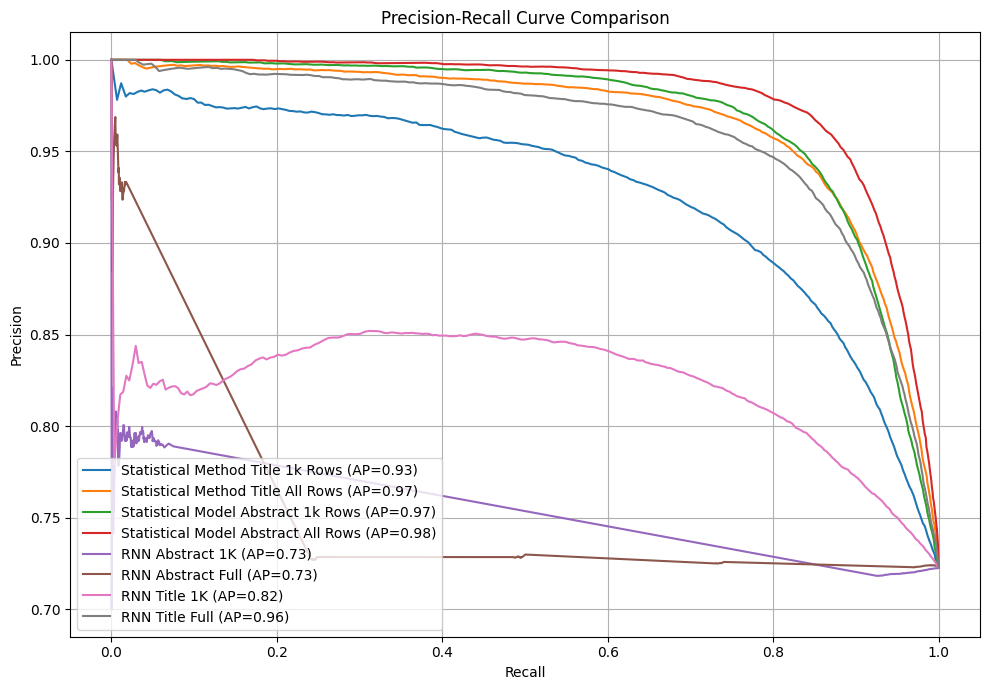

In [ ]:
display_and_plot_model_results(full_results)

## Part 2: Topic Modelling

General comments and any shared processing here.


In [ ]:
# !pip install --upgrade --force-reinstall pandas==1.5.3 numpy==1.23.5
# !pip install --force-reinstall pyldavis==3.3.1 gensim==4.3.1 matplotlib nltk

In [131]:
# import the libraries
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
from gensim.models.phrases import Phrases, Phraser
from gensim.corpora import Dictionary
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from gensim.models import Phrases

import warnings
warnings.filterwarnings("ignore")
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [59]:
# load the dataset
df_train2 = pd.read_csv("/content/drive/MyDrive/5212/train_set.csv", delimiter=',', header=0)

Configuration 1
*   Pre-Processing: Removed Stopwords, Numbers, Rare Tokens and Common Tokens
*   Did not utilize Bigrams and Trigrams
*   Topics: 10

1000 Rows

In [242]:
docs = df_train2['abstract'][:1000].tolist()

# split to tokens
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs)):
    docs[idx] = docs[idx].lower()
    docs[idx] = tokenizer.tokenize(docs[idx])

# remove numbers
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

# Remove words that has 2 or less characters.
docs = [[token for token in doc if len(token) > 2] for doc in docs]

# Lemmatize the tokens
lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# filter out the tokens that appears in less than 10 documents or more than 95% of documents
dictionary.filter_extremes(no_below=10, no_above=0.95)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [243]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 1679
Number of documents: 1000


In [244]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
NUM_TOPICS = 10
chunksize = 2000
passes = 15
iterations = 300
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=NUM_TOPICS,
    passes=passes,
    eval_every=eval_every
)
outputfile = f'model config 1 - 1k rows.gensim'
print("Saving model in " + outputfile)
print("")
model.save(outputfile)

Saving model in model config 1 - 1k rows.gensim



In [245]:
model = LdaModel.load("model config 1 - 1k rows.gensim")
top_topics = model.top_topics(corpus) #, num_words=20)
model.num_topics

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / NUM_TOPICS
print('Average topic coherence: %.4f.' % avg_topic_coherence)

model.print_topics(num_words=20)

Average topic coherence: -1.2518.


[(0,
  '0.023*"that" + 0.022*"for" + 0.017*"model" + 0.015*"with" + 0.014*"this" + 0.010*"our" + 0.010*"data" + 0.009*"learning" + 0.009*"method" + 0.009*"are" + 0.008*"based" + 0.008*"algorithm" + 0.007*"network" + 0.007*"which" + 0.007*"prediction" + 0.007*"system" + 0.006*"neural" + 0.005*"performance" + 0.005*"from" + 0.005*"attack"'),
 (1,
  '0.026*"for" + 0.019*"that" + 0.016*"learning" + 0.013*"with" + 0.013*"this" + 0.013*"network" + 0.013*"our" + 0.011*"method" + 0.009*"are" + 0.009*"function" + 0.009*"training" + 0.008*"model" + 0.008*"neural" + 0.007*"can" + 0.007*"image" + 0.007*"algorithm" + 0.007*"policy" + 0.006*"approach" + 0.006*"show" + 0.006*"from"'),
 (2,
  '0.019*"that" + 0.018*"this" + 0.017*"for" + 0.014*"data" + 0.012*"feature" + 0.011*"are" + 0.010*"based" + 0.010*"with" + 0.010*"method" + 0.009*"from" + 0.008*"our" + 0.008*"approach" + 0.008*"learning" + 0.007*"paper" + 0.007*"model" + 0.006*"word" + 0.006*"result" + 0.006*"problem" + 0.006*"task" + 0.006*"usi

In [246]:
#!pip install pyLDAvis
import pyLDAvis.gensim

lda_display = pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [247]:
topn = 1

# grab topics for each doc
topic_list = model.get_document_topics(corpus, minimum_probability=0.0)

# Find the frequent topics
top_topics = [max(topics, key=lambda x: x[1])[0] for topics in topic_list]

# Add topic info back to original data
df_result = pd.DataFrame({
    "Title": df_train2["title"][:len(corpus)],
    "Abstract": df_train2["abstract"][:len(corpus)],
    "Top_Topic": top_topics
})

# Group by topic and find example articles
for topic_id in range(model.num_topics):
    print("="*80)
    print(f"Topic {int(topic_id)+1}")

    # Print top words for the topic
    top_words = model.show_topic(topic_id, topn=10)
    top_words_str = ", ".join([word for word, _ in top_words])
    print(f"Top Words: {top_words_str}")

    # Get top articles
    subset = df_result[df_result["Top_Topic"] == topic_id]
    exemplar_rows = subset.head(topn)

    for i, row in exemplar_rows.iterrows():
        print(f"\nTitle: {row['Title']}")
        abstract_snippet = row['Abstract'].split(". ")
        preview = ". ".join(abstract_snippet[:2]) + "..."
        print(f"Snippet: {preview}")

Topic 1
Top Words: that, for, model, with, this, our, data, learning, method, are

Title: RoCourseNet: Distributionally Robust Training of a Prediction Aware
  Recourse Model
Snippet:   Counterfactual (CF) explanations for machine learning (ML) models are
preferred by end-users, as they explain the predictions of ML models by
providing a recourse (or contrastive) case to individuals who are adversely
impacted by predicted outcomes. Existing CF explanation methods generate
recourses under the assumption that the underlying target ML model remains
stationary over time...
Topic 2
Top Words: for, that, learning, with, this, network, our, method, are, function

Title: The Nonconvex Geometry of Linear Inverse Problems
Snippet:   The gauge function, closely related to the atomic norm, measures the
complexity of a statistical model, and has found broad applications in machine
learning and statistical signal processing. In a high-dimensional learning
problem, the gauge function attempts to safe

20,000 Rows

In [248]:
from nltk.tokenize import RegexpTokenizer

docs_20k = df_train2['abstract'][:20000].tolist()

# split to tokens
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs_20k)):
    docs_20k[idx] = docs_20k[idx].lower()
    docs_20k[idx] = tokenizer.tokenize(docs_20k[idx])

# remove numbers
docs_20k = [[token for token in doc if not token.isnumeric()] for doc in docs_20k]

# Remove words that has 2 or less characters.
docs_20k = [[token for token in doc if len(token) > 2] for doc in docs_20k]

# Lemmatize the tokens
lemmatizer = WordNetLemmatizer()
docs_20k = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs_20k]

# Create a dictionary representation of the documents.
dictionary_20k = Dictionary(docs_20k)

# filter out the tokens that appears in less than 10 documents or more than 95% of documents
dictionary_20k.filter_extremes(no_below=10, no_above=0.95)

# Bag-of-words representation of the documents.
corpus_20k = [dictionary.doc2bow(doc) for doc in docs_20k]

In [249]:
print('Number of unique tokens: %d' % len(dictionary_20k))
print('Number of documents: %d' % len(corpus_20k))

Number of unique tokens: 7882
Number of documents: 20000


In [250]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
NUM_TOPICS = 10
chunksize = 2000
passes = 15
iterations = 300
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary_20k[0]  # This is only to "load" the dictionary.
id2word = dictionary_20k.id2token

model = LdaModel(
    corpus=corpus_20k,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=NUM_TOPICS,
    passes=passes,
    eval_every=eval_every
)
outputfile = f'model config 1 - 20k rows.gensim'
print("Saving model in " + outputfile)
print("")
model.save(outputfile)

Saving model in model config 1 - 20k rows.gensim



In [251]:
model = LdaModel.load("model config 1 - 20k rows.gensim")
top_topics = model.top_topics(corpus) #, num_words=20)
model.num_topics

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / NUM_TOPICS
print('Average topic coherence: %.4f.' % avg_topic_coherence)

model.print_topics(num_words=20)

Average topic coherence: -2.5558.


[(0,
  '0.024*"extracting" + 0.021*"result" + 0.019*"reflect" + 0.015*"optimization" + 0.014*"computational" + 0.012*"are" + 0.012*"substantial" + 0.010*"reflection" + 0.010*"safeguard" + 0.010*"only" + 0.009*"research" + 0.008*"procedure" + 0.008*"finally" + 0.008*"purpose" + 0.007*"general" + 0.007*"stationary" + 0.007*"showcase" + 0.007*"pdes" + 0.007*"correspond" + 0.006*"success"'),
 (1,
  '0.034*"from" + 0.021*"linear" + 0.017*"worst" + 0.015*"heavy" + 0.014*"extracting" + 0.013*"reconstruction" + 0.012*"prediction" + 0.012*"datasets" + 0.011*"control" + 0.011*"augmented" + 0.010*"acceleration" + 0.010*"reflect" + 0.010*"least" + 0.010*"smile" + 0.009*"interaction" + 0.009*"computational" + 0.009*"reasoning" + 0.008*"result" + 0.008*"finally" + 0.008*"molecule"'),
 (2,
  '0.025*"reflect" + 0.025*"extracting" + 0.020*"teacher" + 0.017*"result" + 0.016*"computational" + 0.015*"four" + 0.012*"shifted" + 0.012*"like" + 0.010*"datasets" + 0.010*"smile" + 0.010*"are" + 0.008*"distribut

In [252]:
#!pip install pyLDAvis
import pyLDAvis.gensim

lda_display = pyLDAvis.gensim.prepare(model, corpus_20k, dictionary_20k, sort_topics=False)
pyLDAvis.display(lda_display)

In [253]:
topn = 1

# grab topics for each doc
topic_list = model.get_document_topics(corpus, minimum_probability=0.0)

# Find the frequent topics
top_topics = [max(topics, key=lambda x: x[1])[0] for topics in topic_list]

# Add topic info back to original data
df_result = pd.DataFrame({
    "Title": df_train2["title"][:len(corpus)],
    "Abstract": df_train2["abstract"][:len(corpus)],
    "Top_Topic": top_topics
})

# Group by topic and find example articles
for topic_id in range(model.num_topics):
    print("="*80)
    print(f"Topic {int(topic_id)+1}")

    # Print top words for the topic
    top_words = model.show_topic(topic_id, topn=10)
    top_words_str = ", ".join([word for word, _ in top_words])
    print(f"Top Words: {top_words_str}")

    # Get top articles
    subset = df_result[df_result["Top_Topic"] == topic_id]
    exemplar_rows = subset.head(topn)

    for i, row in exemplar_rows.iterrows():
        print(f"\nTitle: {row['Title']}")
        abstract_snippet = row['Abstract'].split(". ")
        preview = ". ".join(abstract_snippet[:2]) + "..."
        print(f"Snippet: {preview}")

Topic 1
Top Words: extracting, result, reflect, optimization, computational, are, substantial, reflection, safeguard, only

Title: Like an Open Book? Read Neural Network Architecture with Simple Power
  Analysis on 32-bit Microcontrollers
Snippet:   Model extraction is a growing concern for the security of AI systems. For
deep neural network models, the architecture is the most important information
an adversary aims to recover...
Topic 2
Top Words: from, linear, worst, heavy, extracting, reconstruction, prediction, datasets, control, augmented

Title: Efficient Model-Stealing Attacks Against Inductive Graph Neural Networks
Snippet:   Graph Neural Networks (GNNs) are recognized as potent tools for processing
real-world data organized in graph structures. Especially inductive GNNs, which
allow for the processing of graph-structured data without relying on predefined
graph structures, are becoming increasingly important in a wide range of
applications...
Topic 3
Top Words: reflect, extra

Configuration 2



*   Pre-Processing: Removed Stopwords, Numbers, Rare Tokens and Common Tokens
*   Utilized Bigrams and Trigrams
*   Topics: 30



1000 Articles

In [254]:
docs2_1k = df_train2['abstract'][:1000].tolist()

# split to tokens
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs2_1k)):
    docs2_1k[idx] = docs2_1k[idx].lower()
    docs2_1k[idx] = tokenizer.tokenize(docs2_1k[idx])

# remove numbers
docs2_1k = [[token for token in doc if not token.isnumeric()] for doc in docs2_1k]

# Remove words that has 2 or less characters.
docs2_1k = [[token for token in doc if len(token) > 2] for doc in docs2_1k]

# Lemmatize the tokens
lemmatizer = WordNetLemmatizer()
docs2_1k = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs2_1k]

# Find bigrams and put them in
bigram = Phrases(docs2_1k, min_count=10)
for idx in range(len(docs2_1k)):
    for token in bigram[docs2_1k[idx]]:
        if '_' in token:
            # check to see if its a bigram before adding
            docs2_1k[idx].append(token)

# Create a dictionary representation of the documents.
dictionary2_1k = Dictionary(docs2_1k)

# filter out the tokens that appears in less than 10 documents or more than 95% of documents
dictionary2_1k.filter_extremes(no_below=10, no_above=0.95)

# Bag-of-words representation of the documents.
corpus2 = [dictionary.doc2bow(doc) for doc in docs2_1k]


In [255]:
print('Number of unique tokens: %d' % len(dictionary2_1k))
print('Number of documents: %d' % len(corpus2))

Number of unique tokens: 1885
Number of documents: 1000


In [256]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
NUM_TOPICS = 25
chunksize = 2000
passes = 15
iterations = 300
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary2_1k[0]  # This is only to "load" the dictionary.
id2word = dictionary2_1k.id2token

model = LdaModel(
    corpus=corpus2,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=NUM_TOPICS,
    passes=passes,
    eval_every=eval_every
)
outputfile = f'model config 2 - 1k rows.gensim'
print("Saving model in " + outputfile)
print("")
model.save(outputfile)

Saving model in model config 2 - 1k rows.gensim



In [257]:
model = LdaModel.load("model config 2 - 1k rows.gensim")
top_topics = model.top_topics(corpus2) #, num_words=20)
model.num_topics

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / NUM_TOPICS
print('Average topic coherence: %.4f.' % avg_topic_coherence)

model.print_topics(num_words=20)

Average topic coherence: -1.6457.


[(3,
  '0.089*"another" + 0.056*"introduce" + 0.027*"subject" + 0.026*"distinguish" + 0.025*"constrained" + 0.022*"fine" + 0.019*"aggregation" + 0.018*"larger" + 0.016*"sub" + 0.014*"detect" + 0.012*"diverse" + 0.011*"shared" + 0.011*"improving" + 0.011*"field" + 0.011*"driving" + 0.010*"property" + 0.010*"environment" + 0.010*"bias" + 0.009*"previous" + 0.009*"computational"'),
 (23,
  '0.085*"toward" + 0.033*"assumption" + 0.020*"extract" + 0.015*"costly" + 0.014*"potential" + 0.012*"smaller" + 0.012*"introduce" + 0.011*"chosen" + 0.011*"are" + 0.011*"study" + 0.011*"access" + 0.011*"fine_grained" + 0.010*"our_finding" + 0.010*"driven" + 0.008*"sub" + 0.008*"previously" + 0.007*"model" + 0.007*"textit" + 0.006*"minimization" + 0.006*"standard"'),
 (10,
  '0.074*"developer" + 0.060*"dense" + 0.018*"field" + 0.017*"above" + 0.015*"obtained" + 0.015*"chosen" + 0.012*"data_driven" + 0.011*"significant" + 0.010*"determine" + 0.010*"neural_network" + 0.009*"such" + 0.009*"are" + 0.009*"inv

In [258]:
#!pip install pyLDAvis
import pyLDAvis.gensim

lda_display = pyLDAvis.gensim.prepare(model, corpus2, dictionary2_1k, sort_topics=False)
pyLDAvis.display(lda_display)

In [259]:
topn = 1

# grab topics for each doc
topic_list = model.get_document_topics(corpus, minimum_probability=0.0)

# Find the frequent topics
top_topics = [max(topics, key=lambda x: x[1])[0] for topics in topic_list]

# Add topic info back to original data
df_result = pd.DataFrame({
    "Title": df_train2["title"][:len(corpus)],
    "Abstract": df_train2["abstract"][:len(corpus)],
    "Top_Topic": top_topics
})

# Group by topic and find example articles
for topic_id in range(model.num_topics):
    print("="*80)
    print(f"Topic {int(topic_id)+1}")

    # Print top words for the topic
    top_words = model.show_topic(topic_id, topn=10)
    top_words_str = ", ".join([word for word, _ in top_words])
    print(f"Top Words: {top_words_str}")

    # Get top articles
    subset = df_result[df_result["Top_Topic"] == topic_id]
    exemplar_rows = subset.head(topn)

    for i, row in exemplar_rows.iterrows():
        print(f"\nTitle: {row['Title']}")
        abstract_snippet = row['Abstract'].split(". ")
        preview = ". ".join(abstract_snippet[:2]) + "..."
        print(f"Snippet: {preview}")

Topic 1
Top Words: smaller, chosen, field, potential, supervised, sub, minimization, are, model, over

Title: Like an Open Book? Read Neural Network Architecture with Simple Power
  Analysis on 32-bit Microcontrollers
Snippet:   Model extraction is a growing concern for the security of AI systems. For
deep neural network models, the architecture is the most important information
an adversary aims to recover...
Topic 2
Top Words: assumption, field, larger, significant, sub, smaller, potential, are, fine_grained, attack

Title: Steinhaus Filtration and Stable Paths in the Mapper
Snippet:   Two central concepts from topological data analysis are persistence and the
Mapper construction. Persistence employs a sequence of objects built on data
called a filtration...
Topic 3
Top Words: assumption, potential, larger, field, sub, get, ha, introduce, are, providing

Title: Regularizing and Optimizing LSTM Language Models
Snippet:   Recurrent neural networks (RNNs), such as long short-term memory

20,000 Articles

In [260]:
docs2_20k = df_train2['abstract'][:20000].tolist()

# split to tokens
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs2_20k)):
    docs2_20k[idx] = docs2_20k[idx].lower()  # Convert to lowercase.
    docs2_20k[idx] = tokenizer.tokenize(docs2_20k[idx])  # Split into words.

# remove numbers
docs2_20k = [[token for token in doc if not token.isnumeric()] for doc in docs2_20k]

# Remove words that has 2 or less characters.
docs2_20k = [[token for token in doc if len(token) > 2] for doc in docs2_20k]

# Lemmatize the tokens
lemmatizer = WordNetLemmatizer()
docs2_20k = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs2_20k]

# Find bigrams and put them in
bigram = Phrases(docs2_20k, min_count=10)
for idx in range(len(docs2_20k)):
    for token in bigram[docs2_20k[idx]]:
        if '_' in token:
            # check to see if its a bigram before adding
            docs2_20k[idx].append(token)

# Create a dictionary representation of the documents.
dictionary2_20k = Dictionary(docs2_20k)

# filter out the tokens that appears in less than 10 documents or more than 95% of documents
dictionary2_20k.filter_extremes(no_below=10, no_above=0.95)

# Bag-of-words representation of the documents.
corpus2_20k = [dictionary.doc2bow(doc) for doc in docs2_20k]

In [261]:
print('Number of unique tokens: %d' % len(dictionary2_20k))
print('Number of documents: %d' % len(corpus2_20k))

Number of unique tokens: 11579
Number of documents: 20000


In [262]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
NUM_TOPICS = 25
chunksize = 2000
passes = 15
iterations = 300
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary2_20k[0]  # This is only to "load" the dictionary.
id2word = dictionary2_20k.id2token

model = LdaModel(
    corpus=corpus2_20k,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=NUM_TOPICS,
    passes=passes,
    eval_every=eval_every
)
outputfile = f'model config 2 - 20k rows.gensim'
print("Saving model in " + outputfile)
print("")
model.save(outputfile)

Saving model in model config 2 - 20k rows.gensim



In [263]:
model = LdaModel.load("model config 2 - 20k rows.gensim")
top_topics = model.top_topics(corpus2) #, num_words=20)
model.num_topics

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / NUM_TOPICS
print('Average topic coherence: %.4f.' % avg_topic_coherence)

model.print_topics(num_words=20)

Average topic coherence: -2.8316.


[(18,
  '0.126*"significant" + 0.122*"grid" + 0.074*"allows" + 0.053*"impacting" + 0.041*"manufacturing" + 0.039*"significant_challenge" + 0.038*"neither" + 0.037*"counterfactual_explanation" + 0.030*"synthesized" + 0.021*"jaccard" + 0.015*"formulating" + 0.014*"phrase" + 0.013*"pretrain" + 0.013*"electrical" + 0.012*"independent" + 0.012*"language" + 0.011*"three" + 0.011*"any" + 0.010*"better" + 0.009*"like"'),
 (19,
  '0.249*"propose_new" + 0.159*"known" + 0.148*"investigation_into" + 0.133*"indicate" + 0.057*"will" + 0.054*"contributes" + 0.044*"language" + 0.042*"their" + 0.012*"underscore" + 0.011*"concise" + 0.011*"are" + 0.008*"obtained" + 0.005*"imagenet" + 0.004*"molecular" + 0.004*"argue" + 0.003*"customer" + 0.003*"general" + 0.002*"critical" + 0.002*"extended" + 0.002*"artificial_intelligence"'),
 (5,
  '0.268*"since" + 0.139*"existing" + 0.101*"stimulus" + 0.060*"difference" + 0.058*"see" + 0.054*"development" + 0.035*"probability" + 0.027*"fine_tune" + 0.021*"extension" 

In [264]:
#!pip install pyLDAvis
import pyLDAvis.gensim

lda_display = pyLDAvis.gensim.prepare(model, corpus2_20k, dictionary2_20k, sort_topics=False)
pyLDAvis.display(lda_display)

In [265]:
topn = 1

# grab topics for each doc
topic_list = model.get_document_topics(corpus, minimum_probability=0.0)

# Find the frequent topics
top_topics = [max(topics, key=lambda x: x[1])[0] for topics in topic_list]

# Add topic info back to original data
df_result = pd.DataFrame({
    "Title": df_train2["title"][:len(corpus)],
    "Abstract": df_train2["abstract"][:len(corpus)],
    "Top_Topic": top_topics
})

# Group by topic and find example articles
for topic_id in range(model.num_topics):
    print("="*80)
    print(f"Topic {int(topic_id)+1}")

    # Print top words for the topic
    top_words = model.show_topic(topic_id, topn=10)
    top_words_str = ", ".join([word for word, _ in top_words])
    print(f"Top Words: {top_words_str}")

    # Get top articles
    subset = df_result[df_result["Top_Topic"] == topic_id]
    exemplar_rows = subset.head(topn)

    for i, row in exemplar_rows.iterrows():
        print(f"\nTitle: {row['Title']}")
        abstract_snippet = row['Abstract'].split(". ")
        preview = ". ".join(abstract_snippet[:2]) + "..."
        print(f"Snippet: {preview}")

Topic 1
Top Words: outperform, impacting, real, here, phrase, combining, language, diminish, larger, cost

Title: Self-Supervised Relational Reasoning for Representation Learning
Snippet:   In self-supervised learning, a system is tasked with achieving a surrogate
objective by defining alternative targets on a set of unlabeled data. The aim
is to build useful representations that can be used in downstream tasks,
without costly manual annotation...
Topic 2
Top Words: prior_work, hybrid, numerical, increasingly, impacting, approximate, traditional, selected, learning, replicate

Title: A Structured Review of Literature on Uncertainty in Machine Learning &
  Deep Learning
Snippet:   The adaptation and use of Machine Learning (ML) in our daily lives has led to
concerns in lack of transparency, privacy, reliability, among others. As a
result, we are seeing research in niche areas such as interpretability,
causality, bias and fairness, and reliability...
Topic 3
Top Words: contrastive, assum